In [84]:
from numpy import pi
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_bloch_multivector, plot_state_city

In [85]:
def make_qft3():

    qc = QuantumCircuit(3)

    qc.h(2)
    qc.cp(pi/2, 1, 2)
    qc.cp(pi/4, 0, 2)

    qc.h(1)
    qc.cp(pi/2, 0, 1)

    qc.h(0)

    qc.swap(0, 2)

    return qc

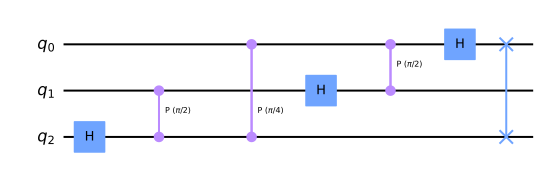

In [86]:
qft3 = make_qft3()
qft3.draw()

In [87]:
def apply_qft3(value):
    bin_value = bin(value)[2:].zfill(3)
    qc = QuantumCircuit(3)
    qc.initialize(bin_value, qc.qubits)
    qft3 = make_qft3()
    qc = qc.compose(qft3)
    display(qc.draw())

    sim = Aer.get_backend("aer_simulator")
    qc.save_statevector()
    statevector = sim.run(qc).result().get_statevector()
    display(plot_bloch_multivector(statevector))

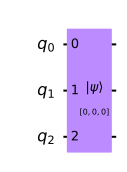

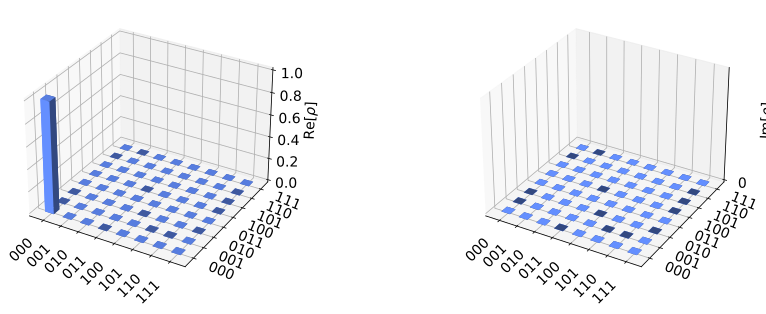

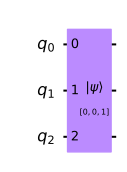

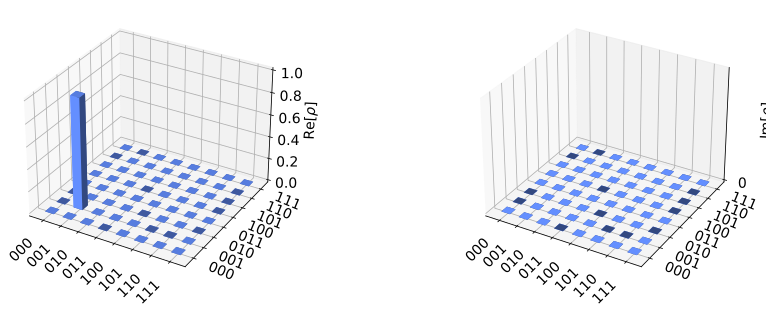

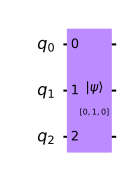

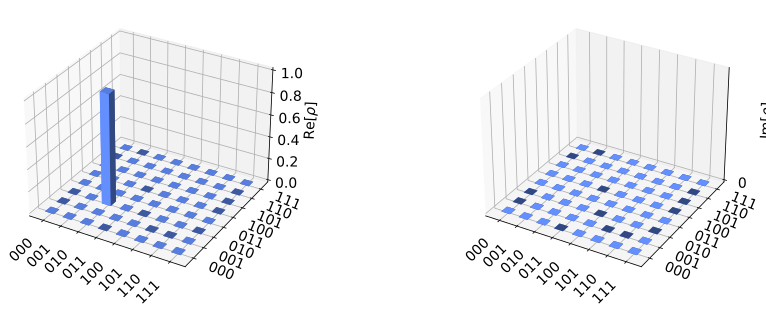

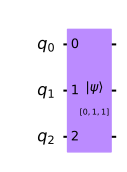

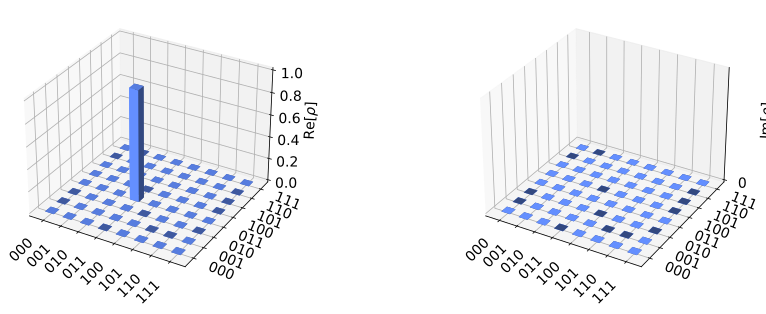

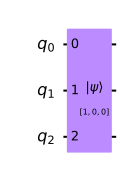

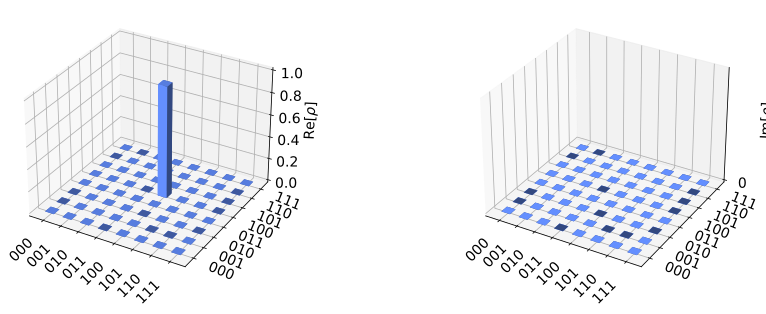

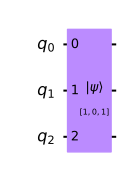

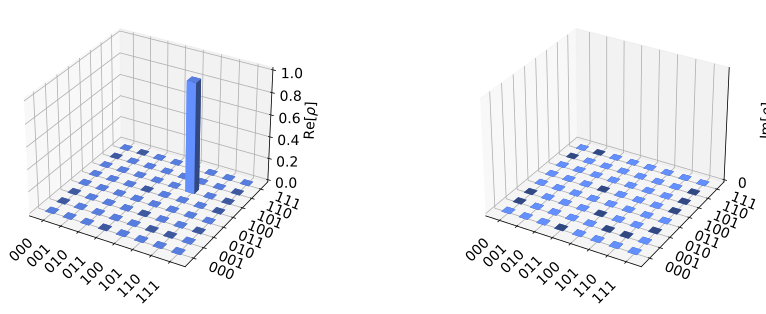

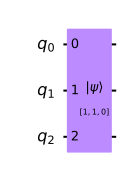

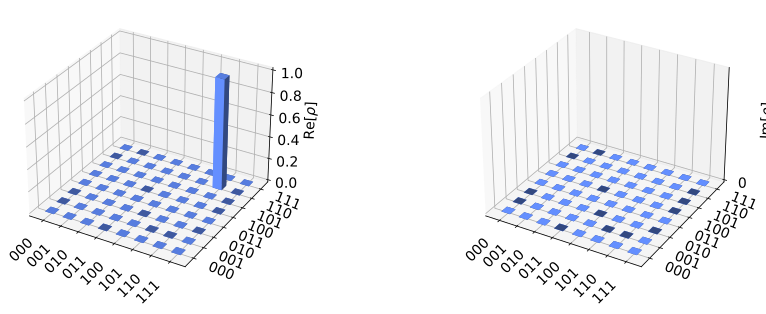

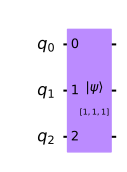

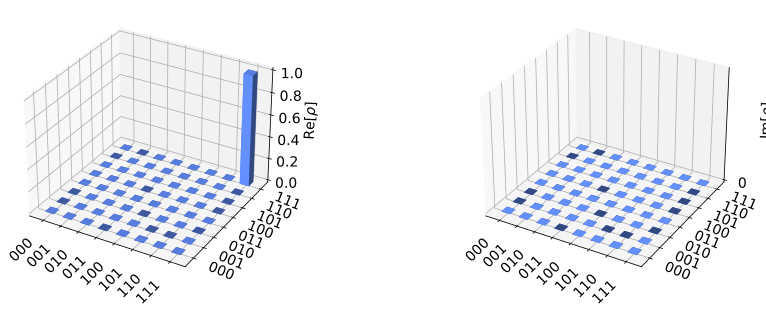

In [88]:

for value in range(0, 8):
    apply_qft3(value)